# Proyecto Relaciones Contaminantes Salud

# Contaminante PM10

In [1]:
# Se van a agrupar los registros del contaminante en semanas

# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante = 'PM10'
# Se declaran las columnas a extraer de la base de datos
columns = ['timestamp', contaminante]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante = pd.read_csv('filled.csv', usecols=columns).dropna()
# Se convierten los strings a objeto datetime
strfdt = '%d-%b-%y %H'
dataframecontaminante['timestamp'] = pd.to_datetime(dataframecontaminante['timestamp'], errors = 'coerce', format=strfdt)
# Se eliminan los espacios vacios
dataframecontaminante = dataframecontaminante.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante = dataframecontaminante.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante

,timestamp,PM10
0,1993-01-01 00:00:00,41.0
1,1993-01-01 00:00:00,30.5
2,1993-01-01 00:00:00,60.0
3,1993-01-01 00:00:00,38.5
4,1993-01-01 01:00:00,41.0
...,...,...
1382706,2018-12-31 23:00:00,445.0
1382707,2018-12-31 23:00:00,134.0
1382708,2018-12-31 23:00:00,392.0
1382709,2018-12-31 23:00:00,40.0


In [2]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante['timestamp'] = dataframecontaminante['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante

,timestamp,PM10
0,1993-01-01 00,41.0
1,1993-01-01 00,30.5
2,1993-01-01 00,60.0
3,1993-01-01 00,38.5
4,1993-01-01 01,41.0
...,...,...
1382706,2018-12-31 23,445.0
1382707,2018-12-31 23,134.0
1382708,2018-12-31 23,392.0
1382709,2018-12-31 23,40.0


# (Año 2014)

In [3]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2014'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,PM10
0,2014-01-01 00,192.0
1,2014-01-01 00,137.0
2,2014-01-01 00,250.0
3,2014-01-01 00,157.0
4,2014-01-01 00,214.0
...,...,...
79668,2014-12-31 23,26.0
79669,2014-12-31 23,12.0
79670,2014-12-31 23,13.0
79671,2014-12-31 23,21.0


In [4]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,PM10
0,2014-01-01 00:00:00,192.0
1,2014-01-01 00:00:00,137.0
2,2014-01-01 00:00:00,250.0
3,2014-01-01 00:00:00,157.0
4,2014-01-01 00:00:00,214.0
...,...,...
79668,2014-12-31 23:00:00,26.0
79669,2014-12-31 23:00:00,12.0
79670,2014-12-31 23:00:00,13.0
79671,2014-12-31 23:00:00,21.0


In [5]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,PM10,sem
0,2014-01-01 00:00:00,192.0,1
1,2014-01-01 00:00:00,137.0,1
2,2014-01-01 00:00:00,250.0,1
3,2014-01-01 00:00:00,157.0,1
4,2014-01-01 00:00:00,214.0,1
...,...,...,...
79668,2014-12-31 23:00:00,26.0,53
79669,2014-12-31 23:00:00,12.0,53
79670,2014-12-31 23:00:00,13.0,53
79671,2014-12-31 23:00:00,21.0,53


In [6]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
0,2014-11-20 00:00:00,19,P220
1,2014-09-17 00:00:00,19,O829
2,2014-09-10 00:00:00,19,O809
3,2014-09-05 00:00:00,19,O689
5,2014-09-03 00:00:00,19,O809
...,...,...,...
2883843,2014-07-31 00:00:00,19,T07X
2883859,2014-06-02 00:00:00,19,R568
2883875,2014-01-02 00:00:00,19,J219
2893242,2014-04-21 00:00:00,19,S822


In [7]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2014-11-20,19,P220,47
1,2014-09-17,19,O829,38
2,2014-09-10,19,O809,37
3,2014-09-05,19,O689,36
4,2014-09-03,19,O809,36
...,...,...,...,...
56964,2014-07-31,19,T07X,31
56965,2014-06-02,19,R568,23
56966,2014-01-02,19,J219,1
56967,2014-04-21,19,S822,17


In [8]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1      498
2     1047
3     1079
4     1160
5     1170
6      988
7     1069
8     1110
9     1075
10    1035
11    1121
12    1112
13    1040
14    1181
15    1246
16    1017
17    1046
18    1052
19    1051
20    1106
21    1122
22    1135
23    1146
24    1219
25    1175
26    1031
27    1143
28    1136
29    1181
30    1156
31    1149
32    1082
33    1094
34    1141
35    1142
36    1147
37    1197
38    1102
39    1116
40    1178
41    1165
42    1153
43    1135
44    1073
45    1118
46    1189
47    1104
48    1200
49    1117
50    1091
51    1041
52     588
Name: sem, dtype: int64

In [9]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contamin

,sem,PM10
0,1,90.25
1,2,75.214578
2,3,86.162162
3,4,88.145517
4,5,94.997992
5,6,64.252475
6,7,89.566131
7,8,97.972121
8,9,93.022854
9,10,73.130909



2014
Coeficiente de correlación de Pearson:  -0.293937279992138
P-value:  0.03442518079714641
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.983
Date:                Sun, 06 Mar 2022   Prob (F-statistic):             0.0921
Time:                        11:50:26   Log-Likelihood:                -57.123
No. Observations:                  41   AIC:                             118.2
Df Residuals:                      39   BIC:                             121.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

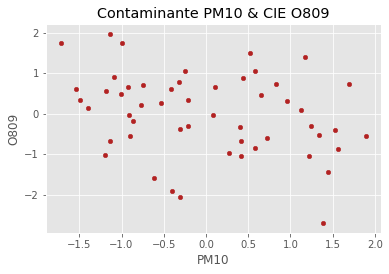

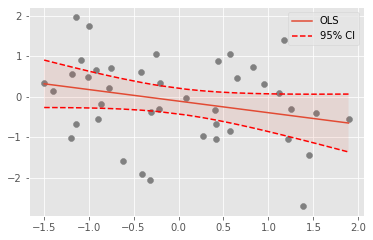

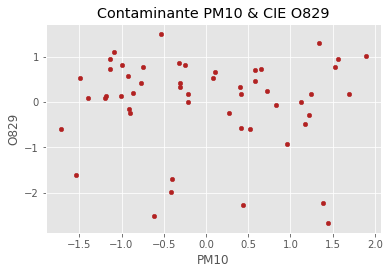

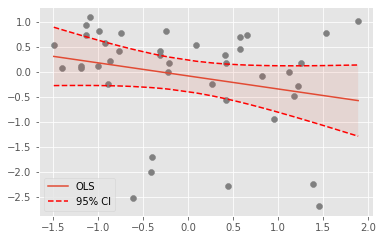

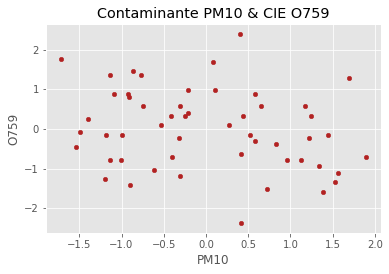

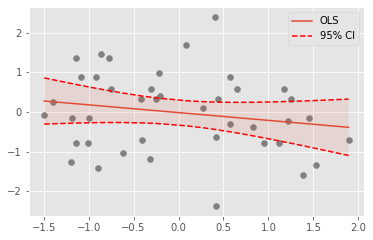

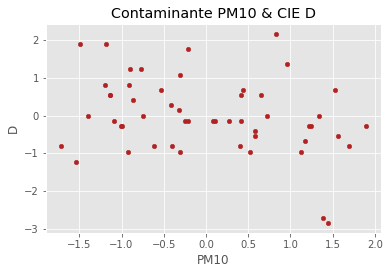

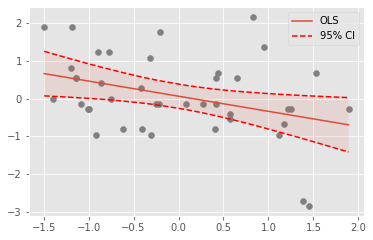

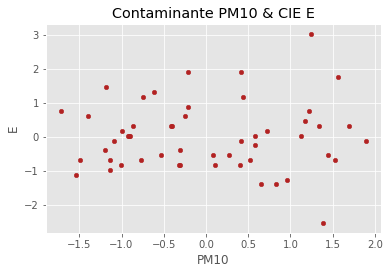

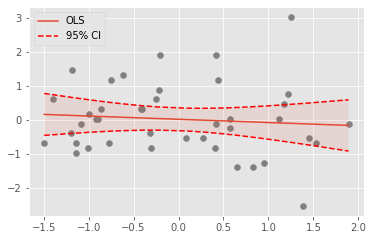

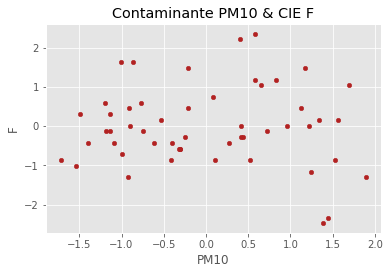

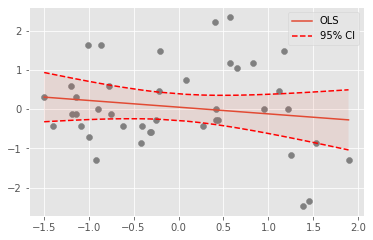

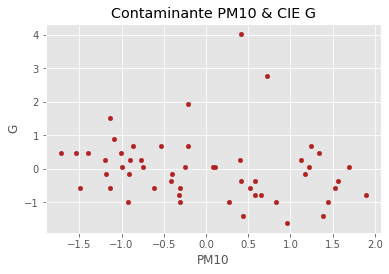

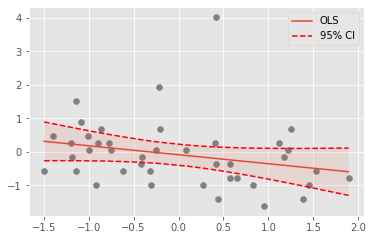

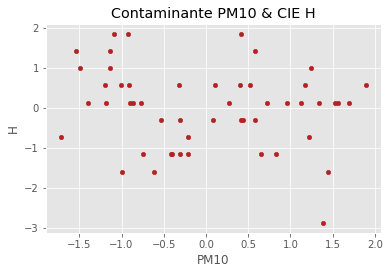

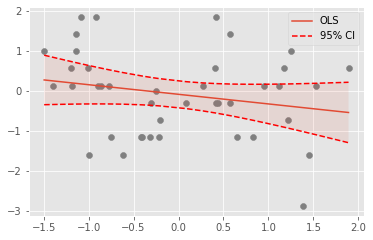

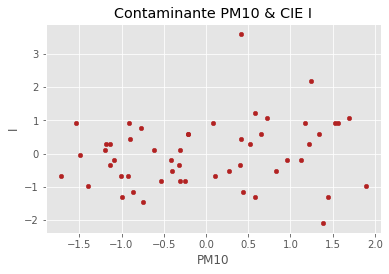

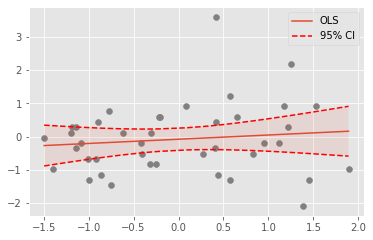

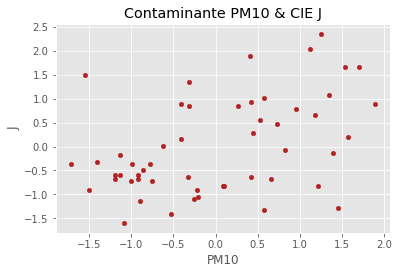

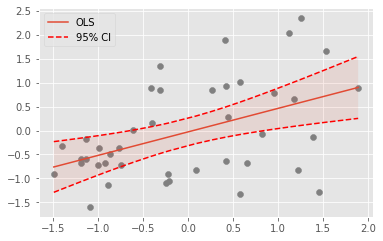

In [10]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import style
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import numpy as np

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 3

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        #df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        datos = pd.DataFrame(dataframegraficoañocontaminantecie, columns=col_names)
        datos = datos.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
        # Gráfico
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        datos.plot(
            x    = col_names[0],
            y    = col_names[1],
            c    = 'firebrick',
            kind = "scatter",
            ax   = ax
        )
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])


        # Correlación lineal entre las dos variables
        # ==============================================================================
        corr_test = pearsonr(x = datos[col_names[0]].fillna(0), y =  datos[col_names[1]].fillna(0))
        print("Coeficiente de correlación de Pearson: ", corr_test[0])
        print("P-value: ", corr_test[1])

        # División de los datos en train y test
        # ==============================================================================
        X = datos[[col_names[0]]].fillna(0)
        y = datos[col_names[1]].fillna(0)

        X_train, X_test, y_train, y_test = train_test_split(
            X.values.reshape(-1,1),
            y.values.reshape(-1,1),
            train_size   = 0.8,
            random_state = 1234,
            shuffle      = True
        )
        
        #x2 = xx.values.tolist()
        #y2 = yy.values.tolist()

        # Creación del modelo utilizando matrices como en scikitlearn
        # ==============================================================================
        # A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
        #x = np.array(x2).astype(float)
        #y = np.array(y2).astype(float)
        #ones = np.ones(len(x[0]))
        #X = sm.add_constant(np.column_stack((x[0], ones)))
        #for ele in x[1:]:
        X_train = sm.add_constant(X_train, prepend=True)
        modelo = sm.OLS(endog=y_train, exog=X_train)
        modelo = modelo.fit()
        print(modelo.summary())

        # Intervalos de confianza para los coeficientes del modelo
        # # ==============================================================================
        modelo.conf_int(alpha=0.05)

        # Predicciones con intervalo de confianza del 95%
        # # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones.head(4)        

        # Predicciones con intervalo de confianza del 95%
        # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones['x'] = X_train[:, 1]
        predicciones['y'] = y_train
        predicciones = predicciones.sort_values('x')

        # Gráfico del modelo
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
        ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
        ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
        ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
        ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
        ax.legend()

        # Error de test del modelo 
        # ==============================================================================
        X_test = sm.add_constant(X_test, prepend=True)
        predicciones = modelo.predict(exog = X_test)
        rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
            )
        print("")
        vmin = abs(y_train.min())
        vmax = abs(y_train.max())
        pval = vmin + vmax
        pe = (rmse*100)/pval
        print(f"El error (rmse) de test es: {rmse}")
        print(f"El porcentaje de error de test es: {pe}")

        #fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        #print('\n' + col_names[0] + ' & ' + col_names[1])
        #ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        #ax.set_xlabel('Semana del año ' + año)
        #sns.kdeplot(data=df_s)
        #plt.show()


    cont = cont+1